<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Изучение-и-предобработка-исходных-данных" data-toc-modified-id="Изучение-и-предобработка-исходных-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучение и предобработка исходных данных</a></span></li><li><span><a href="#Анализ-данных-и-графики" data-toc-modified-id="Анализ-данных-и-графики-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных и графики</a></span><ul class="toc-item"><li><span><a href="#Соотношение-видов-объектов-общественного-питания-по-количеству" data-toc-modified-id="Соотношение-видов-объектов-общественного-питания-по-количеству-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Соотношение видов объектов общественного питания по количеству</a></span></li><li><span><a href="#Соотношение-сетевых-и-несетевых-заведений-по-количеству" data-toc-modified-id="Соотношение-сетевых-и-несетевых-заведений-по-количеству-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Соотношение сетевых и несетевых заведений по количеству</a></span></li><li><span><a href="#Отношение-сетевых-заведений-к-общему-числу-по-виду" data-toc-modified-id="Отношение-сетевых-заведений-к-общему-числу-по-виду-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Отношение сетевых заведений к общему числу по виду</a></span></li><li><span><a href="#Среднее-число-посадочных-мест-в-зависимости-от-размера-сети" data-toc-modified-id="Среднее-число-посадочных-мест-в-зависимости-от-размера-сети-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Среднее число посадочных мест в зависимости от размера сети</a></span></li><li><span><a href="#Среднее-количество-посадочных-мест-по-виду-предприятия" data-toc-modified-id="Среднее-количество-посадочных-мест-по-виду-предприятия-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Среднее количество посадочных мест по виду предприятия</a></span></li><li><span><a href="#Топ-10-улиц-по-числу-заведений-общественного-питания" data-toc-modified-id="Топ-10-улиц-по-числу-заведений-общественного-питания-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Топ-10 улиц по числу заведений общественного питания</a></span></li><li><span><a href="#Улицы-с-одним-объектом-общественного-питания" data-toc-modified-id="Улицы-с-одним-объектом-общественного-питания-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Улицы с одним объектом общественного питания</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Рекомендации" data-toc-modified-id="Рекомендации-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Рекомендации</a></span></li></ul></div>

# Рынок заведений общественного питания Москвы

## Описание проекта

Стартап собирается запустить в Москве необычное кафе — вместо официантов гостей в нем будут обслуживать роботы. Проект дорогой, но потенциально может "выстрелить". Для привлечения средств на развитие необходимо убедить инвесторов в перспективности проекта. А для этого необходимо представить им презентацию с результатами исследования рынка заведений общественного питания Москвы и дать рекомендации о том, где лучше расположить кафе.

Имеются открытые данные о заведениях общественного питания в Москве — таблица rest_data со следующей информацией:
- id — идентификатор объекта;
- object_name — название объекта общественного питания;
- chain — сетевой ресторан;
- object_type — тип объекта общественного питания;
- address — адрес;
- number — количество посадочных мест.

План работы:
- загрузка и предобработка данных;
- анализ данных, построение графиков;
- выводы.

## Изучение и предобработка исходных данных

In [24]:
# !pip install folium
# !pip install geopy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
from geopy.geocoders import Nominatim
import folium
import requests
from urllib.parse import urlencode
import re
pd.options.display.max_colwidth = 150
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
pd.set_option('chained_assignment', None)

In [4]:
df = pd.read_csv('C:/Users/Антон/datasets/rest_data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [6]:
df['object_name'] = df['object_name'].str.lower()
df['address'] = df['address'].str.lower()
df

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город москва, 3-й крутицкий переулок, дом 18",50
15362,209264,шоколадница,да,кафе,"город москва, улица земляной вал, дом 33",10
15363,209186,шоколадница,да,кафе,"город москва, улица земляной вал, дом 33",20
15364,221900,шоколадница,да,кафе,"город москва, поселение московский, киевское шоссе, 22-й километр, домовладение 4, строение 1",36


In [7]:
df.duplicated().sum()

0

Функция для выявления неявных пустых значений

In [8]:
def nan_values(df,nan_list=('',' ', '""', '" "', None, np.nan)):
    list_count=[]
    list_share=[]
    odds=[]
    for col in df.columns:
        list_count.append(sum(df[col].isin(nan_list)))
        list_share.append(round(sum(df[col].isin(nan_list)) * 100 / len(df), 2))
        odds.append(len(df)-sum(df[col].isin(nan_list)))
    missing_values = pd.DataFrame({'column_name' :df.columns,
                                   'num_missing' : list_count,
                                   'odds' : odds,
                                   'percent_missing' : list_share})
    return missing_values

nan_values(df)

,column_name,num_missing,odds,percent_missing
0,id,0,15366,0.0
1,object_name,0,15366,0.0
2,chain,0,15366,0.0
3,object_type,0,15366,0.0
4,address,0,15366,0.0
5,number,0,15366,0.0


Уберем объекты, которые в принципе не могут считаться заведениями общественного питания ввиду того, что это режимные объекты: школы, гимназии, автобусные парки, медицинские учреждения и т.п.

In [9]:
df_clean = df[~df['object_name'].str.contains('школ|гимназ|автобус|корпус|медицин|автоком|бауман|гбоу|мгу')].copy()
df_clean

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город москва, 3-й крутицкий переулок, дом 18",50
15362,209264,шоколадница,да,кафе,"город москва, улица земляной вал, дом 33",10
15363,209186,шоколадница,да,кафе,"город москва, улица земляной вал, дом 33",20
15364,221900,шоколадница,да,кафе,"город москва, поселение московский, киевское шоссе, 22-й километр, домовладение 4, строение 1",36


Приведем названия наиболее известных сетевых предприятий к одному виду

In [10]:
df_clean.loc[df_clean['object_name'].str.contains('friday'), 'object_name'] = 'tgi fridays'
df_clean.loc[df_clean['object_name'].str.contains('kfc'), 'object_name'] = 'kfc'
df_clean.loc[df_clean['object_name'].str.contains('ваби-саби'), 'object_name'] = 'ваби-саби'
df_clean.loc[df_clean['object_name'].str.contains('starbucks'), 'object_name'] = 'starbucks'
df_clean.loc[df_clean['object_name'].str.contains('subway'), 'object_name'] = 'subway'
df_clean.loc[df_clean['object_name'].str.contains('якитория'), 'object_name'] = 'якитория'
df_clean.loc[df_clean['object_name'].str.contains('штолле'), 'object_name'] = 'штолле'
df_clean.loc[df_clean['object_name'].str.contains('джон джоли'), 'object_name'] = 'джон джоли'
df_clean.loc[df_clean['object_name'].str.contains('шоколадница'), 'object_name'] = 'шоколадница'
df_clean.loc[df_clean['object_name'].str.contains('хлеб насущный'), 'object_name'] = 'хлеб насущный'
df_clean.loc[df_clean['object_name'].str.contains('теремок'), 'object_name'] = 'теремок'
df_clean.loc[df_clean['object_name'].str.contains('стардог'), 'object_name'] = 'стардогс'
df_clean.loc[df_clean['object_name'].str.contains('волконский'), 'object_name'] = 'волконский'
df_clean.loc[df_clean['object_name'].str.contains('тануки'), 'object_name'] = 'тануки'
df_clean.loc[df_clean['object_name'].str.contains('макдоналдс'), 'object_name'] = 'макдоналдс'
df_clean.loc[df_clean['object_name'].str.contains('грабли'), 'object_name'] = 'грабли'
df_clean.loc[df_clean['object_name'].str.contains('нияма'), 'object_name'] = 'нияма'
df_clean.loc[df_clean['object_name'].str.contains('шантим'), 'object_name'] = 'шантимель'
df_clean.loc[df_clean['object_name'].str.contains('маки-маки'), 'object_name'] = 'маки-маки'
df_clean.loc[df_clean['object_name'].str.contains('кофемания'), 'object_name'] = 'кофемания'
df_clean.loc[df_clean['object_name'].str.contains('кружка'), 'object_name'] = 'кружка'
df_clean.loc[df_clean['object_name'].str.contains('андерсон'), 'object_name'] = 'андерсон'
df_clean.loc[df_clean['object_name'].str.contains('папа джонс'), 'object_name'] = 'папа джонс'
df_clean.loc[df_clean['object_name'].str.contains('милти'), 'object_name'] = 'милти'
df_clean.loc[df_clean['object_name'].str.contains('магбургер'), 'object_name'] = 'магбургер'
df_clean.loc[df_clean['object_name'].str.contains('вобла'), 'object_name'] = 'золотая вобла'
df_clean.loc[df_clean['object_name'].str.contains('бульба'), 'object_name'] = 'тарас бульба'
df_clean.loc[df_clean['object_name'].str.contains('додо'), 'object_name'] = 'додо пицца'
df_clean.loc[df_clean['object_name'].str.contains('брать'), 'object_name'] = 'кулинарная лавка братьев караваевых'
df_clean.loc[df_clean['object_name'].str.contains('алло'), 'object_name'] = 'алло пицца'
df_clean.loc[df_clean['object_name'].str.contains('тапчан'), 'object_name'] = 'тапчан'
df_clean.loc[df_clean['object_name'].str.contains('то да'), 'object_name'] = 'то да сё'
df_clean.loc[df_clean['object_name'].str.contains('бургер кинг'), 'object_name'] = 'бургер кинг'
df_clean.loc[df_clean['object_name'].str.contains('чайхона №1'), 'object_name'] = 'чайхона №1'
df_clean.loc[df_clean['object_name'].str.contains('вареничная №1'), 'object_name'] = 'вареничная №1'
df_clean.loc[df_clean['object_name'].str.contains('прайм стар') |
             df_clean['object_name'].str.contains('prime star'), 'object_name'] = 'prime star'
df_clean.loc[df_clean['object_name'].str.contains('суши wok') |
             df_clean['object_name'].str.contains('сушиwok'), 'object_name'] = 'суши wok'
df_clean.loc[df_clean['object_name'].str.contains('домино') &
             df_clean['object_name'].str.contains('пицца'), 'object_name'] = "домино'c пицца"
df_clean.loc[df_clean['object_name'].str.contains('данкин донатс') |
             df_clean['object_name'].str.contains('dunkin donuts'), 'object_name'] = "данкин донатс"
df_clean.loc[df_clean['object_name'].str.contains('pizza hut') |
             df_clean['object_name'].str.contains('пицца хат'), 'object_name'] = "пицца хат"
df_clean.loc[df_clean['object_name'].str.contains('крошка') &
             df_clean['object_name'].str.contains('картошка'), 'object_name'] = 'крошка картошка'
df_clean.loc[df_clean['object_name'].str.contains('вьет кафе') |
             df_clean['object_name'].str.contains('вьеткафе'), 'object_name'] = "вьеткафе"
df_clean.loc[df_clean['object_name'].str.contains('сабв'), 'object_name'] = "subway"
df_clean.loc[df_clean['object_name'].str.contains('му-му') |
             df_clean['object_name'].str.contains('му му'), 'object_name'] = "му-му"
df_clean.loc[df_clean['object_name'].str.contains('кофе-хаус') |
             df_clean['object_name'].str.contains('кофе хаус'), 'object_name'] = "кофе хаус"
df_clean.loc[df_clean['object_name'].str.contains('патио') |
             df_clean['object_name'].str.contains('patio'), 'object_name'] = "иль-патио"
df_clean.loc[df_clean['object_name'].str.contains('даблби') |
             df_clean['object_name'].str.contains('дабл би') |
             df_clean['object_name'].str.contains('double b'), 'object_name'] = "дабл би"
df_clean.loc[df_clean['object_name'].str.contains('мята лаунж') |
             df_clean['object_name'].str.contains('мята lounge'), 'object_name'] = "мята lounge"
df_clean.loc[df_clean['object_name'].str.contains('суши сет'), 'object_name'] = "суши-сет"
df_clean.loc[df_clean['object_name'].str.contains('ёрш'), 'object_name'] = "ёрш"
df_clean

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город москва, 3-й крутицкий переулок, дом 18",50
15362,209264,шоколадница,да,кафе,"город москва, улица земляной вал, дом 33",10
15363,209186,шоколадница,да,кафе,"город москва, улица земляной вал, дом 33",20
15364,221900,шоколадница,да,кафе,"город москва, поселение московский, киевское шоссе, 22-й километр, домовладение 4, строение 1",36


Избавимся от столбца id, найдем и удалим дубликаты

In [11]:
df_clean = df_clean.drop(['id'], axis=1)
df_clean

,object_name,chain,object_type,address,number
0,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48
1,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95
3,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40
4,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...
15361,шоколадница,да,кафе,"город москва, 3-й крутицкий переулок, дом 18",50
15362,шоколадница,да,кафе,"город москва, улица земляной вал, дом 33",10
15363,шоколадница,да,кафе,"город москва, улица земляной вал, дом 33",20
15364,шоколадница,да,кафе,"город москва, поселение московский, киевское шоссе, 22-й километр, домовладение 4, строение 1",36


In [12]:
df_clean.duplicated().sum()

81

In [13]:
df_clean = df_clean.drop_duplicates()
df_clean

,object_name,chain,object_type,address,number
0,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48
1,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95
3,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40
4,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...
15361,шоколадница,да,кафе,"город москва, 3-й крутицкий переулок, дом 18",50
15362,шоколадница,да,кафе,"город москва, улица земляной вал, дом 33",10
15363,шоколадница,да,кафе,"город москва, улица земляной вал, дом 33",20
15364,шоколадница,да,кафе,"город москва, поселение московский, киевское шоссе, 22-й километр, домовладение 4, строение 1",36


## Анализ данных и графики

### Соотношение видов объектов общественного питания по количеству

In [14]:
rest_types = df_clean.groupby('object_type')['object_name'].count().sort_values(ascending=False).reset_index()
rest_types

,object_type,object_name
0,кафе,6066
1,ресторан,2282
2,предприятие быстрого обслуживания,1897
3,столовая,1458
4,бар,854
5,буфет,394
6,кафетерий,394
7,закусочная,345
8,магазин (отдел кулинарии),273


In [ ]:
fig = go.Figure(data=[go.Pie(labels=rest_types['object_type'], values=rest_types['object_name'],
                             textposition='outside')])
fig.update_layout(title='Соотношение видов объектов общественного питания по количеству')
fig.show()

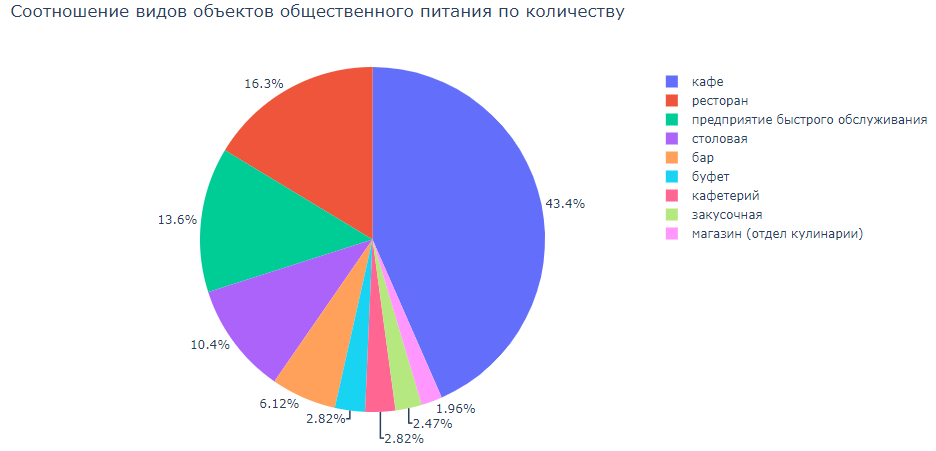

Больше всего в Москве кафе — почти 6100 (или около 43%), затем идут рестораны (2300 штук, или 16%), предприятия фастфуда (1900, почти 14%), столовые (1600, 10%).

### Соотношение сетевых и несетевых заведений по количеству

In [16]:
chains_grouped = df_clean.groupby('chain')['object_name'].count().reset_index()
chains_grouped.loc[0, 'chain'] = 'сетевое'
chains_grouped.loc[1, 'chain'] = 'несетевое'
chains_grouped

,chain,object_name
0,сетевое,2964
1,несетевое,10999


In [41]:
round(10999 / sum(chains_grouped['object_name']) * 100)

79

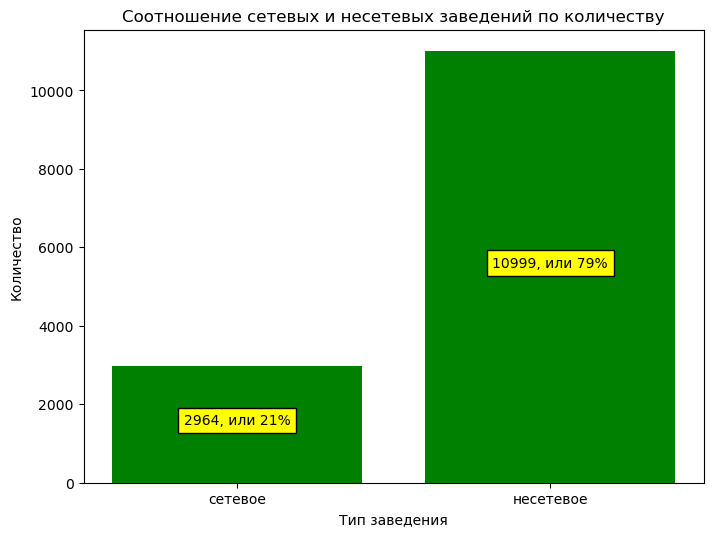

In [43]:
fig, ax = plt.subplots()
ax.bar(chains_grouped['chain'], chains_grouped['object_name'], color = 'green')
ax.set_title('Соотношение сетевых и несетевых заведений по количеству')
ax.set_xlabel('Тип заведения')
ax.set_ylabel('Количество')
for i in range(len(ax.patches)):
    height = ax.patches[i].get_height()
    perc = round(height / sum(chains_grouped['object_name']) * 100)
    plt.text(i, height/2,
             f'{height}, или {perc}%',
             ha = 'center', bbox = dict(facecolor = 'yellow'))
fig.set_figheight(6)
fig.set_figwidth(8)
plt.show()

По типу заведений подавляющее число — несетевые (11000, что составляет 79%). Сетевых — почти 3000 тысячи, или 21%.

### Отношение сетевых заведений к общему числу по виду

In [44]:
df_is_chain = df_clean.pivot_table(index='object_type', columns='chain', values='object_name',
                                   aggfunc='count').reset_index()
df_is_chain['ratio'] = round(df_is_chain['да']/(df_is_chain['нет']+df_is_chain['да'])*100, 2)
df_is_chain = df_is_chain.sort_values('ratio', ascending=False)
df_is_chain.columns = ['Вид объекта', 'Сетевое', 'Несетевое', 'Процент сетевых']
df_is_chain['Вид объекта'] = df_is_chain['Вид объекта'].str.wrap(15).apply(lambda x: x.replace('\n', '<br>'))
df_is_chain

,Вид объекта,Сетевое,Несетевое,Процент сетевых
6,предприятие быстрого обслуживания,788,1109,41.54
5,магазин (отдел кулинарии),78,195,28.57
7,ресторан,543,1739,23.79
3,кафе,1396,4670,23.01
2,закусочная,56,289,16.23
4,кафетерий,52,342,13.20
0,бар,37,817,4.33
1,буфет,11,383,2.79
8,столовая,3,1455,0.21


In [ ]:
fig = px.bar(
    df_is_chain, x='Вид объекта', y='Процент сетевых',
    title='Процент сетевых заведений по виду',
    width=850, height=650
            )
fig.update_xaxes(tickangle=30)
fig.show()

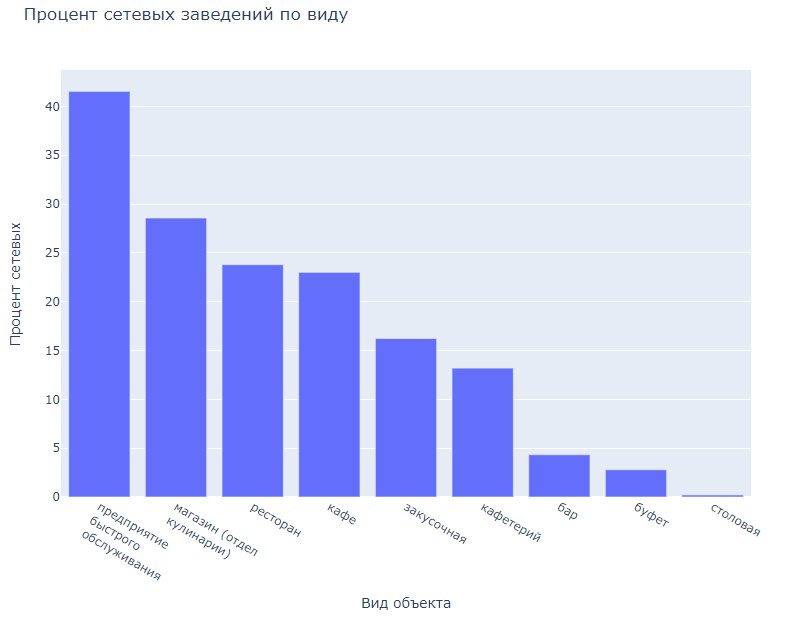

В категории фаст-фуда наибольший процент сетевых заведений — 42%. Далее идут отделы кулинарии в магазинах (почти 29%), рестораны (24%), кафе (23%).

### Среднее число посадочных мест в зависимости от размера сети

In [48]:
df_chains = df_clean.query('chain == "да"')
df_chains

,object_name,chain,object_type,address,number
3,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40
6,брусника,да,кафе,"город москва, переулок сивцев вражек, дом 6/2",10
13,алло пицца,да,кафе,"город москва, улица авиаторов, дом 14",32
16,суши wok,да,предприятие быстрого обслуживания,"город москва, азовская улица, дом 3",7
18,тануки,да,ресторан,"город москва, большая академическая улица, дом 65",160
...,...,...,...,...,...
15361,шоколадница,да,кафе,"город москва, 3-й крутицкий переулок, дом 18",50
15362,шоколадница,да,кафе,"город москва, улица земляной вал, дом 33",10
15363,шоколадница,да,кафе,"город москва, улица земляной вал, дом 33",20
15364,шоколадница,да,кафе,"город москва, поселение московский, киевское шоссе, 22-й километр, домовладение 4, строение 1",36


Отсеим "сети", в которых только одно предприятие, и рассчитаем среднее число посадочных мест по сетям

In [50]:
df_chains_grouped = df_chains.groupby('object_name').agg({'object_type': 'count', 'number': 'mean'}).reset_index()
df_chains_grouped = df_chains_grouped[df_chains_grouped['object_type'] > 1]
df_chains_grouped['number'] = df_chains_grouped['number'].astype(int)
df_chains_grouped.sort_values('object_name')

,object_name,object_type,number
3,bocconcino,3,66
6,burger club,3,20
8,coffeeshop company,4,47
9,cofix,25,9
11,correas,3,44
...,...,...,...
377,шоколадница,185,57
379,штолле,19,28
381,якитория,50,118
384,япоша,2,105


Категоризируем заведения по количеству посадочных мест и величине сети (по три категории в каждой плоскости).

In [51]:
bin_labels_chain = ['небольшая сеть (2-3)', 'средняя сеть (3-7)', 'крупная сеть (7-187)']
df_chains_grouped['chain_category'] = pd.qcut(df_chains_grouped['object_type'], q=3, labels=bin_labels_chain)
df_chains_grouped

,object_name,object_type,number,chain_category
3,bocconcino,3,66,небольшая сеть (2-3)
6,burger club,3,20,небольшая сеть (2-3)
8,coffeeshop company,4,47,средняя сеть (3-7)
9,cofix,25,9,крупная сеть (7-187)
11,correas,3,44,небольшая сеть (2-3)
...,...,...,...,...
377,шоколадница,185,57,крупная сеть (7-187)
379,штолле,19,28,крупная сеть (7-187)
381,якитория,50,118,крупная сеть (7-187)
384,япоша,2,105,небольшая сеть (2-3)


In [52]:
bin_labels_seats = ['немного мест (до 25)', 'среднеее число мест (25-70)', 'много мест (70-258)']
df_chains_grouped['seats_category'] = pd.qcut(df_chains_grouped['number'], q=3, labels=bin_labels_seats)
df_chains_grouped.sort_values(by='number')

,object_name,object_type,number,chain_category,seats_category
58,wokker,2,0,небольшая сеть (2-3),немного мест (до 25)
33,my box,2,0,небольшая сеть (2-3),немного мест (до 25)
192,кофе с собой,44,0,крупная сеть (7-187),немного мест (до 25)
258,пицца паоло,15,0,крупная сеть (7-187),немного мест (до 25)
319,стардогс,18,1,крупная сеть (7-187),немного мест (до 25)
...,...,...,...,...,...
181,кафе пронто,3,211,небольшая сеть (2-3),много мест (70-258)
321,старина мюллер старина миллер,2,215,небольшая сеть (2-3),много мест (70-258)
340,темпл бар,3,216,небольшая сеть (2-3),много мест (70-258)
253,пилзнер,2,245,небольшая сеть (2-3),много мест (70-258)


In [53]:
df_chains_seats_ratio = df_chains_grouped.groupby(['chain_category', 'seats_category'])['object_name'].count()
df_chains_seats_ratio

chain_category        seats_category             
небольшая сеть (2-3)  немного мест (до 25)           29
                      среднеее число мест (25-70)    24
                      много мест (70-258)            33
средняя сеть (3-7)    немного мест (до 25)           14
                      среднеее число мест (25-70)    15
                      много мест (70-258)            13
крупная сеть (7-187)  немного мест (до 25)           21
                      среднеее число мест (25-70)    20
                      много мест (70-258)            16
Name: object_name, dtype: int64

In [ ]:
fig = go.Figure(data=[go.Pie(labels=df_chains_seats_ratio.index, values=df_chains_seats_ratio)])
fig.update_layout(title='Соотношение видов объектов общественного питания по количеству')
fig.show()

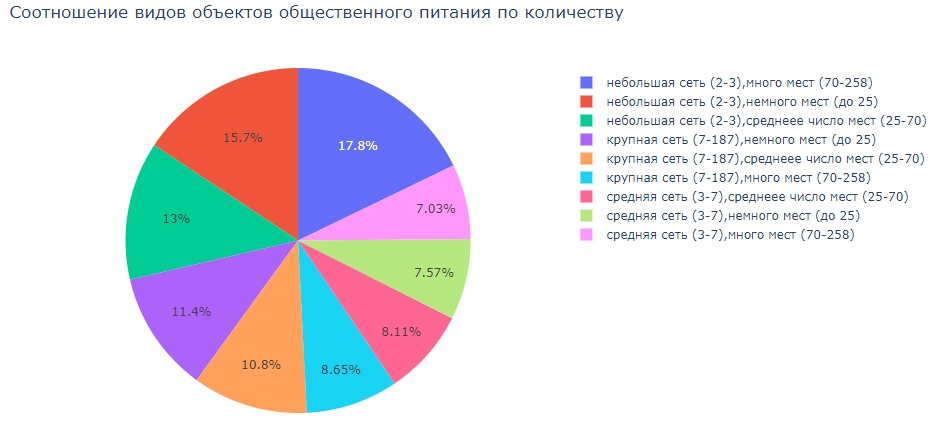

В процентном соотношении больше всего (почти 18%) небольших сетей (2-3 объекта в сети) с большим числом посадочных мест (от 70). Затем идут (около 16%) небольшие сети с небольшим числом мест (до 25).
    
Крупных сетей (от 7 объектов) с небольшим количеством мест около 11%.

### Среднее количество посадочных мест по виду предприятия

In [58]:
df_clean_seats_mean = df_clean.groupby('object_type')['number'].mean().round().astype(int).reset_index()
df_clean_seats_mean = df_clean_seats_mean.sort_values('number', ascending=False)
df_clean_seats_mean.columns = ['Вид объекта', 'Среднее число мест']
df_clean_seats_mean

,Вид объекта,Среднее число мест
8,столовая,107
7,ресторан,97
0,бар,44
3,кафе,40
1,буфет,38
6,предприятие быстрого обслуживания,21
4,кафетерий,9
2,закусочная,7
5,магазин (отдел кулинарии),6


In [ ]:
df_clean_seats_mean['Вид объекта'] = df_clean_seats_mean['Вид объекта'].str.wrap(15).apply(lambda x: x.replace('\n', '<br>'))

fig = px.bar(
    df_clean_seats_mean, x='Вид объекта', y='Среднее число мест',
    title='Среднее количество посадочных мест по виду предприятия',
    width=850, height=650
            )
fig.update_xaxes(tickangle=30)
fig.show()

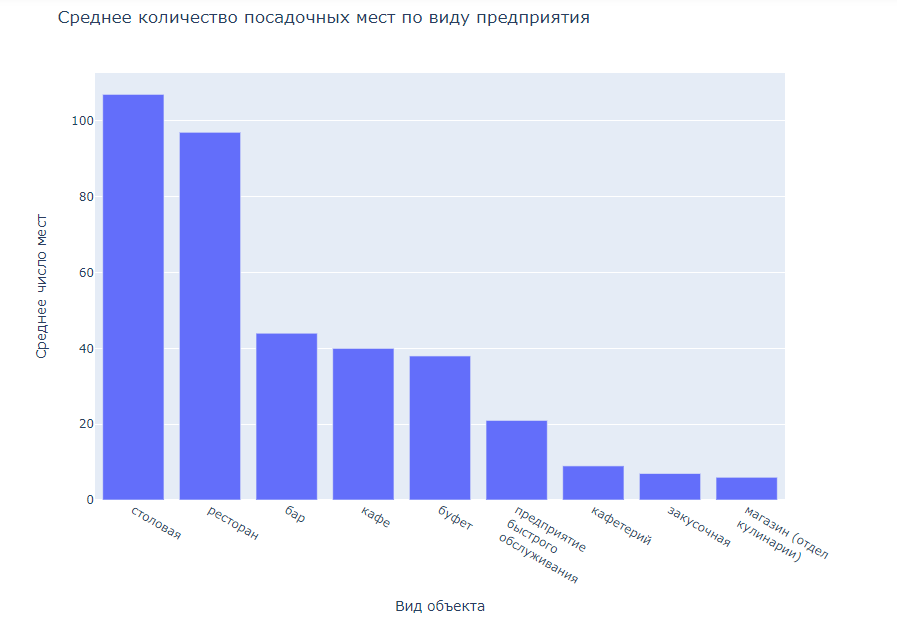

В топе по среднему числу мест — столовые (107 мест) и рестораны (97). Далее — бары, буфеты и кафе (около 40 у всех).

### Топ-10 улиц по числу заведений общественного питания

Сначала выделим в отдельный столбец информацию об улице из столбца 'address'.

In [60]:
def street(address):
    address = address.split(', ')
    street_type = ('улица', 'шоссе', 'переулок', 'проспект',
                   'набережная', 'бульвар', 'проезд', 'площадь',
                   'аллея', 'линия', 'квартал', 'деревня',
                   'микрорайон', 'зеленоград', 'посёлок',
                   'село', 'тупик', 'территория', 'просек',
                   'поселение')
    for address_part in address:
        for street in street_type:
            if street in address_part:
                return address_part
    return 'мкад'

In [61]:
df_clean['street'] = df_clean['address'].apply(street)
df_clean

,object_name,chain,object_type,address,number,street
0,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова
1,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина
2,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица
3,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица
4,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица
...,...,...,...,...,...,...
15361,шоколадница,да,кафе,"город москва, 3-й крутицкий переулок, дом 18",50,3-й крутицкий переулок
15362,шоколадница,да,кафе,"город москва, улица земляной вал, дом 33",10,улица земляной вал
15363,шоколадница,да,кафе,"город москва, улица земляной вал, дом 33",20,улица земляной вал
15364,шоколадница,да,кафе,"город москва, поселение московский, киевское шоссе, 22-й километр, домовладение 4, строение 1",36,поселение московский


In [62]:
streets_grouped = df_clean.groupby('street')['object_name'].count().sort_values(ascending=False).reset_index()
streets_grouped = streets_grouped[~streets_grouped['street'].str.contains('город|поселение')].reset_index(drop=True)
streets_grouped_10 = streets_grouped.head(10)
streets_grouped_10.columns = ['Улица', 'Количество заведений общественного питания']
streets_grouped_10

,Улица,Количество заведений общественного питания
0,проспект мира,199
1,профсоюзная улица,173
2,ленинградский проспект,171
3,пресненская набережная,167
4,варшавское шоссе,157
5,ленинский проспект,137
6,проспект вернадского,122
7,каширское шоссе,109
8,кутузовский проспект,109
9,ходынский бульвар,102


In [ ]:
streets_grouped_10_copy = streets_grouped_10.copy()

streets_grouped_10_copy['Улица'] = streets_grouped_10_copy['Улица'].str.wrap(15).apply(lambda x: x.replace('\n', '<br>'))

fig = px.bar(
    streets_grouped_10_copy, x='Улица', y='Количество заведений общественного питания',
    title='Топ-10 улиц по числу заведений общественного питания',
    width=850, height=650
            )
fig.update_xaxes(tickangle=30)
fig.show()

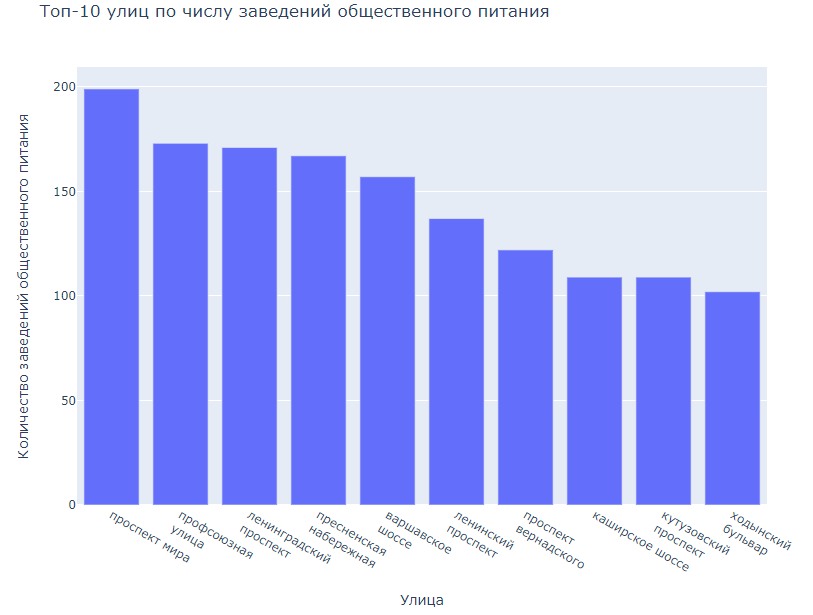

Самая насыщенная объектами общественного питания улица — Проспект Мира (199 заведений). Далее — Профсоюзная улица (173) и Ленинградский проспект (171).

Нарисуем интерактивную карту с десятью улицами, на которых больше всего заведений общественного питания. Для этого с помощью функции добавим в таблицу координаты улиц.

In [97]:
def position(address_string):
    geolocator = Nominatim(user_agent = 'my_request')
    try:
        location = geolocator.geocode('Москва ' + address_string)
        loc=[location.latitude, location.longitude]
        return loc
    except AttributeError:
        return 'null'

In [77]:
streets_grouped_10['position'] = streets_grouped_10['Улица'].apply(position)
streets_grouped_10

,Улица,Количество заведений общественного питания,position
0,проспект мира,199,"[55.7796332, 37.6317532]"
1,профсоюзная улица,173,"[55.6784984, 37.5633442]"
2,ленинградский проспект,171,"[55.8022688, 37.5240363]"
3,пресненская набережная,167,"[55.7460766, 37.5385734]"
4,варшавское шоссе,157,"[55.7016391, 37.6214873]"
5,ленинский проспект,137,"[55.7076167, 37.5862116]"
6,проспект вернадского,122,"[55.6771999, 37.5060872]"
7,каширское шоссе,109,"[55.6643937, 37.6302453]"
8,кутузовский проспект,109,"[55.7248854, 37.4552108]"
9,ходынский бульвар,102,"[55.788635, 37.5399117]"


In [ ]:
m = folium.Map(location=streets_grouped_10['position'][3],
              zoom_start=10)

for marker in range(len(streets_grouped_10)):
    folium.Marker(location=streets_grouped_10.loc[marker][2],
                 popup=f'''{streets_grouped_10.loc[marker][0]}.
                 Число заведений — {streets_grouped_10.loc[marker][1]}''').add_to(m)
    
m

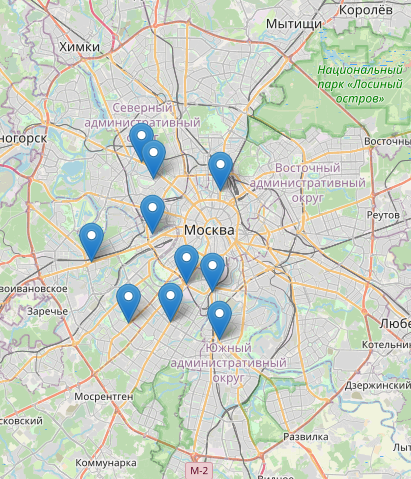

Больше всего заведений общественного питания располагается на протяженных и широких вылетных магистралях — шоссе и проспектах. Основная часть районов, через которые проходят эти улицы, расположена на юге, юго-западе и севере Москвы.

In [88]:
top10_streets_30_each = pd.DataFrame()
for street in streets_grouped_10['Улица']:
    df_street = df_clean.query('street == @street').sample(30)
    top10_streets_30_each = pd.concat([top10_streets_30_each, df_street], ignore_index=True)
top10_streets_30_each

,object_name,chain,object_type,address,number,street
0,венское кафе,нет,кафе,"город москва, проспект мира, дом 92, строение 1",70,проспект мира
1,банкетный зал «галактика»,нет,ресторан,"город москва, проспект мира, дом 150",250,проспект мира
2,джаганнат,да,кафе,"город москва, проспект мира, дом 31",25,проспект мира
3,закусочная labobaloca,нет,предприятие быстрого обслуживания,"город москва, проспект мира, дом 211, корпус 2",12,проспект мира
4,крафтовый кофе-бар,нет,кафетерий,"город москва, проспект мира, дом 102, корпус 2",0,проспект мира
...,...,...,...,...,...,...
295,ciao pizza,нет,кафе,"город москва, ходынский бульвар, дом 4",0,ходынский бульвар
296,хинкали & хачапури,нет,кафе,"город москва, ходынский бульвар, дом 4",0,ходынский бульвар
297,дабл би,нет,кафетерий,"город москва, ходынский бульвар, дом 4",0,ходынский бульвар
298,чао пицца,нет,кафе,"город москва, ходынский бульвар, дом 4",23,ходынский бульвар


In [89]:
moscow_districts = pd.read_csv('C:/Users/Антон/Notebooks/Улицы Москвы csv/mosgaz-streets.csv')

In [90]:
moscow_districts['streetname'] = moscow_districts['streetname'].str.lower()
moscow_districts['area'] = moscow_districts['area'].str.lower()
moscow_districts

,streetname,areaid,okrug,area
0,выставочный переулок,17,ЦАО,пресненский район
1,улица гашека,17,ЦАО,пресненский район
2,большая никитская улица,17,ЦАО,пресненский район
3,глубокий переулок,17,ЦАО,пресненский район
4,большой гнездниковский переулок,17,ЦАО,пресненский район
...,...,...,...,...
4393,вознесенский проезд,17,ЦАО,пресненский район
4394,волков переулок,17,ЦАО,пресненский район
4395,поварская улица,17,ЦАО,пресненский район
4396,кудринская площадь,17,ЦАО,пресненский район


In [91]:
top10_streets_district = top10_streets_30_each.merge(moscow_districts, left_on='street', right_on='streetname')
top10_streets_district

,object_name,chain,object_type,address,number,street,streetname,areaid,okrug,area
0,венское кафе,нет,кафе,"город москва, проспект мира, дом 92, строение 1",70,проспект мира,проспект мира,70,СВАО,алексеевский район
1,венское кафе,нет,кафе,"город москва, проспект мира, дом 92, строение 1",70,проспект мира,проспект мира,86,СВАО,ярославский район
2,венское кафе,нет,кафе,"город москва, проспект мира, дом 92, строение 1",70,проспект мира,проспект мира,78,СВАО,район марьина роща
3,венское кафе,нет,кафе,"город москва, проспект мира, дом 92, строение 1",70,проспект мира,проспект мира,79,СВАО,останкинский район
4,венское кафе,нет,кафе,"город москва, проспект мира, дом 92, строение 1",70,проспект мира,проспект мира,81,СВАО,район ростокино
...,...,...,...,...,...,...,...,...,...,...
1375,ciao pizza,нет,кафе,"город москва, ходынский бульвар, дом 4",0,ходынский бульвар,ходынский бульвар,69,САО,хорошевский район
1376,хинкали & хачапури,нет,кафе,"город москва, ходынский бульвар, дом 4",0,ходынский бульвар,ходынский бульвар,69,САО,хорошевский район
1377,дабл би,нет,кафетерий,"город москва, ходынский бульвар, дом 4",0,ходынский бульвар,ходынский бульвар,69,САО,хорошевский район
1378,чао пицца,нет,кафе,"город москва, ходынский бульвар, дом 4",23,ходынский бульвар,ходынский бульвар,69,САО,хорошевский район


In [92]:
top10_streets_district.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1380 entries, 0 to 1379
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   object_name  1380 non-null   object
 1   chain        1380 non-null   object
 2   object_type  1380 non-null   object
 3   address      1380 non-null   object
 4   number       1380 non-null   int64 
 5   street       1380 non-null   object
 6   streetname   1380 non-null   object
 7   areaid       1380 non-null   int64 
 8   okrug        1380 non-null   object
 9   area         1380 non-null   object
dtypes: int64(2), object(8)
memory usage: 118.6+ KB


In [93]:
top10_streets_district_grouped = top10_streets_district.groupby('area')['object_name'].count().reset_index()
top10_streets_district_grouped

,area,object_name
0,академический район,30
1,алексеевский район,30
2,донской район,60
3,ломоносовский район,60
4,мещанский район,30
5,нагорный район,30
6,обручевский район,60
7,останкинский район,30
8,пресненский район,30
9,район аэропорт,30


In [98]:
top10_streets_district_grouped['district_coords'] = top10_streets_district_grouped['area'].apply(position)
top10_streets_district_grouped

,area,object_name,district_coords
0,академический район,30,"[55.689739, 37.576771]"
1,алексеевский район,30,"[55.8148783, 37.6506684]"
2,донской район,60,"[55.705227, 37.601639]"
3,ломоносовский район,60,"[55.6799618, 37.5332552]"
4,мещанский район,30,"[55.779172, 37.6279886]"
5,нагорный район,30,"[55.670368, 37.61636]"
6,обручевский район,60,"[55.6641579, 37.5203033]"
7,останкинский район,30,"[55.8204298, 37.6178834]"
8,пресненский район,30,"[55.7622146, 37.5606576]"
9,район аэропорт,30,"[55.8026178, 37.5402974]"


In [ ]:
m2 = folium.Map(location=top10_streets_district_grouped['district_coords'][2],
              zoom_start=10)

for marker in range(len(top10_streets_district_grouped)):
    try:
        folium.Marker(location=top10_streets_district_grouped.loc[marker][2],
                 popup=top10_streets_district_grouped.loc[marker][0]).add_to(m2)
    except ValueError:
        continue

m2

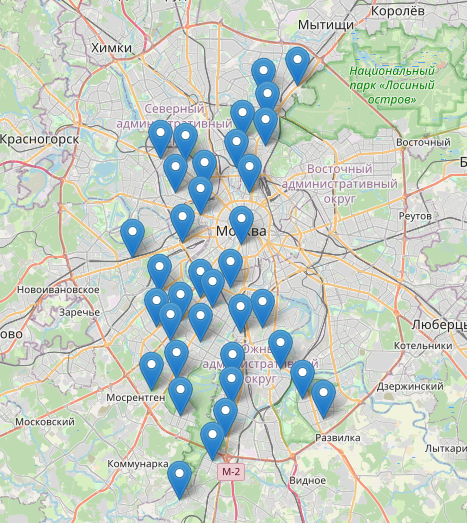

### Улицы с одним объектом общественного питания

Построим тепловую карту Москвы с улицами, на которых одно заведение общественного питания.

In [105]:
streets_grouped_single = streets_grouped.query('object_name == 1').reset_index(drop=True)
streets_grouped_single

,street,object_name
0,1-й сельскохозяйственный проезд,1
1,1-й рижский переулок,1
2,чуксин тупик,1
3,ялтинская улица,1
4,автомобильный проезд,1
...,...,...
479,ереванская улица,1
480,улица академика опарина,1
481,улица академика павлова,1
482,улица академика петровского,1


Загрузим предподготовленный файл с координатами улиц.

In [106]:
# используем api 
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://disk.yandex.ru/d/WRNG-wUX6EwI7w' # ссылка на скачиваемый файл
 
# получаем загрузочную ссылку 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
 
# загружаем файл в df 
download_response = requests.get(download_url) 
streets_grouped_single_yd = pd.read_csv(download_url, index_col=0)

streets_grouped_single_yd

,street,object_name,position
0,1-й сельскохозяйственный проезд,1,"[55.8320438, 37.6474053]"
1,1-й рижский переулок,1,"[55.8081568, 37.656623]"
2,чуксин тупик,1,"[55.8064584, 37.5577309]"
3,ялтинская улица,1,"[55.6526158, 37.6116116]"
4,автомобильный проезд,1,"[55.7284429, 37.7077368]"
...,...,...,...
477,ереванская улица,1,"[55.6297476, 37.674066]"
478,улица академика опарина,1,"[55.6438321, 37.5007698]"
479,улица академика павлова,1,"[55.7399597, 37.3949031]"
480,улица академика петровского,1,"[55.7206447, 37.6034349]"


In [107]:
streets_grouped_single_yd[['latitude', 'longitude']] = streets_grouped_single_yd['position'].str.split(', ', expand=True)
streets_lat_long = streets_grouped_single_yd.drop(['position'], axis=1)
streets_lat_long['latitude'] = streets_lat_long['latitude'].apply(lambda x: x[1:]).astype('float64')
streets_lat_long['longitude'] = streets_lat_long['longitude'].apply(lambda x: x[:-1]).astype('float64')
streets_lat_long

,street,object_name,latitude,longitude
0,1-й сельскохозяйственный проезд,1,55.832044,37.647405
1,1-й рижский переулок,1,55.808157,37.656623
2,чуксин тупик,1,55.806458,37.557731
3,ялтинская улица,1,55.652616,37.611612
4,автомобильный проезд,1,55.728443,37.707737
...,...,...,...,...
477,ереванская улица,1,55.629748,37.674066
478,улица академика опарина,1,55.643832,37.500770
479,улица академика павлова,1,55.739960,37.394903
480,улица академика петровского,1,55.720645,37.603435


In [ ]:
fig = px.density_mapbox(streets_lat_long, lat='latitude', lon='longitude', radius=12,
                        center=dict(lat=55.763443, lon=37.600770), zoom=9.5,
                        mapbox_style='open-street-map',
                        title='Тепловая карта улиц с одним предприятием общественного питания',
                        width=1000,
                        height=800)
fig.show()

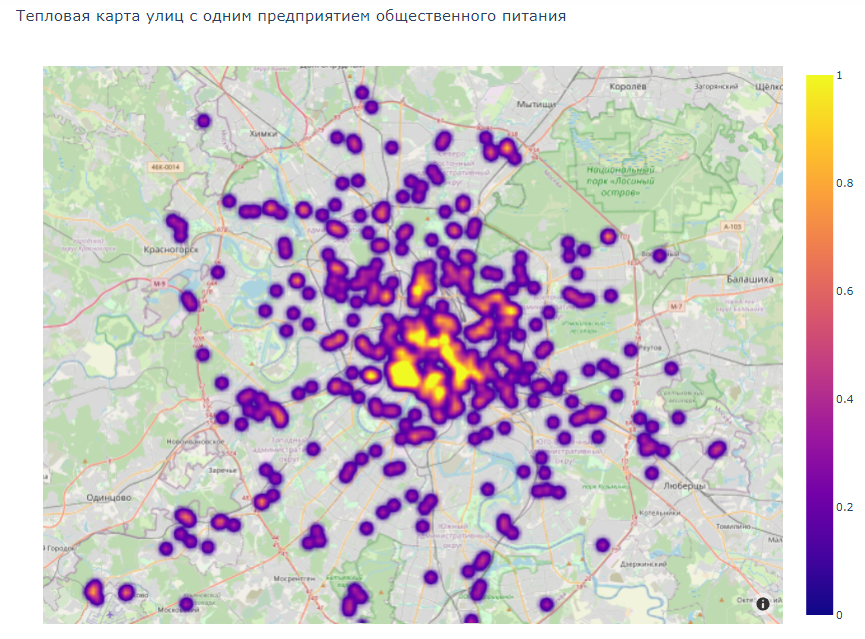

Больше всего улиц с одним предприятием общественного питания располагается в центре Москвы. Это связано с тем, что в центре в основном коротенькие и узкие жилые улочки, если отбросить автомобильные трассы.

Всего улиц с одним заведением общественного питания — 491.

## Выводы

Мы изучили рынок заведений общественного питания Москвы и обнаружили следующее: 

- Больше всего в Москве кафе — почти 6100 (или около 43%), затем идут рестораны (2300 штук, или 16%), предприятия фаст-фуда (1900, почти 14%), столовые (1600, 10%).

- По типу заведений подавляющее число — несетевые (11 000, что составляет 79%). Сетевых — почти 3000 тысячи, или 21%.

- В категории фаст-фуда наибольший процент сетевых заведений — 42%. Далее идут отделы кулинарии в магазинах (почти 29%), рестораны (24%), кафе (23%).

- В топе по среднему числу мест — столовые (114 мест) и рестораны (97). Далее — бары, буфеты и кафе (около 40 у всех).

- Самая насыщенная объектами общественного питания улица — Проспект Мира (200 заведений). Далее — Профсоюзная улица (174) и Ленинградский проспект (172).

- Больше всего заведений общественного питания располагается на протяженных и широких вылетных магистралях — шоссе и проспектах. Основная часть этих улиц расположена в южных и западных районах Москвы.

- Больше всего улиц с одним предприятием общественного питания располагается в центре Москвы. Всего таких улиц — 491.

## Рекомендации

- Создаваемое предприятие общественного питания, как представляется, должно относиться к виду кафе, т.к. именно таких заведений больше всего в Москве, из чего можно сделать вывод, что они чувствуют себя лучше всего.

- В среднем в московских кафе 40 посадочных мест. Вероятно, в нашем кафе стоит сделать 40-50 мест.

Презентация в формате PDF — https://disk.yandex.ru/i/808C9OtZpJuiOA